# Projet de Data Mining
# Elaboré par Syrine Alioua
Nous avons des données qui classent si les patients ont une maladie cardiaque ou non en fonction de ses caractéristiques. Nous essaierons d’utiliser ces données pour créer un modèle qui essaie de prédire si un patient a cette maladie ou non. Nous utiliserons l’algorithme de régression logistique (classification).
# Les données contiennent :

#### âge : âge en années
#### sexe : (1 = homme; 0 = femme)
#### cp : type de douleur thoracique
#### trépied : pression artérielle au repos (en mm Hg à l’admission à l’hôpital)
#### chol : cholestérol sérique en mg/dl
#### fbs :(glycémie à jeun > 120 mg/dl) (1 = vrai; 0 = faux)
#### restecg : résultats électrocardiographiques au repos
#### thalach : fréquence cardiaque maximale atteinte
#### exang : angine induite par l’exercice (1 = oui; 0 = non)
#### oldpeak : dépression ST induite par l’exercice par rapport au repos
#### pente : la pente du segment ST de l’exercice de pointe
#### ça : nombre de vaisseaux principaux (0-3) colorés par flourosopie
#### thal : 3 = normal; 6 = défaut fixe; 7 = défaut réversible
#### target : Y binaire: maladie ou non (1=oui (54.46%), 0=non(45.54%))

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
from sklearn.feature_selection import RFECV,chi2
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_regression

from scipy.stats import ttest_ind

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz

from sklearn.metrics import recall_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve

In [99]:
# We are reading our data
df = pd.read_csv("heart.csv")

In [100]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration


In [101]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

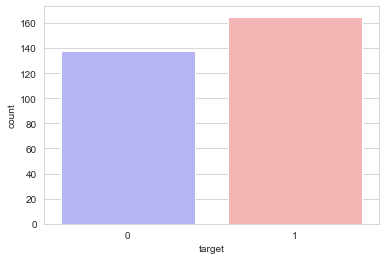

In [102]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [103]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


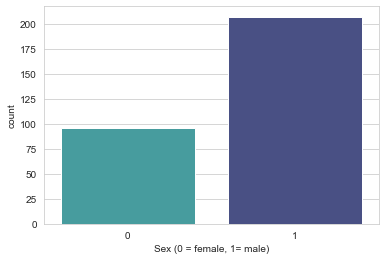

In [104]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [105]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [106]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


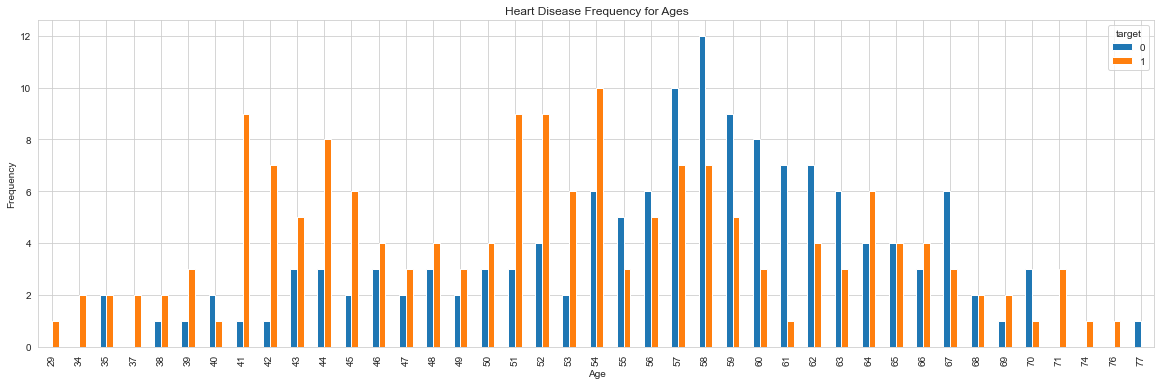

In [107]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

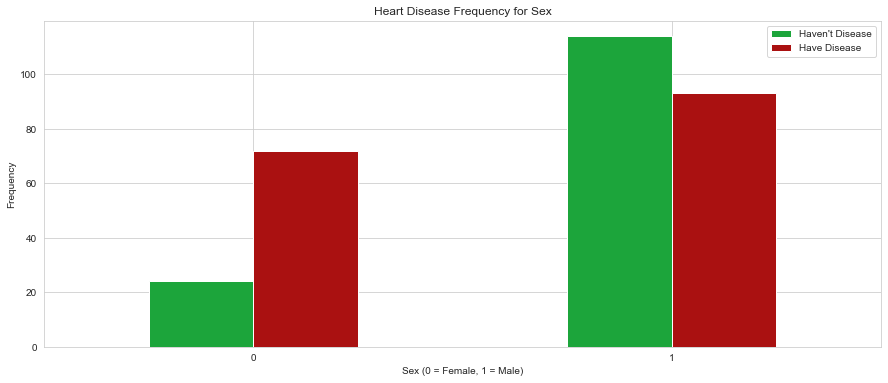

In [108]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

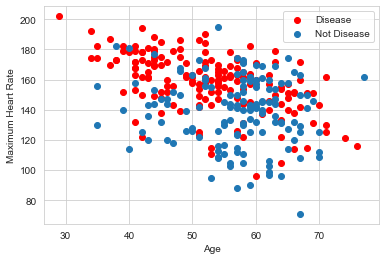

In [109]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

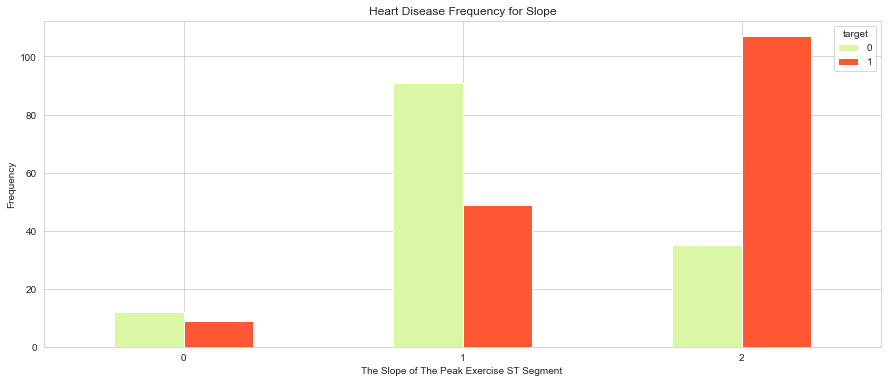

In [110]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

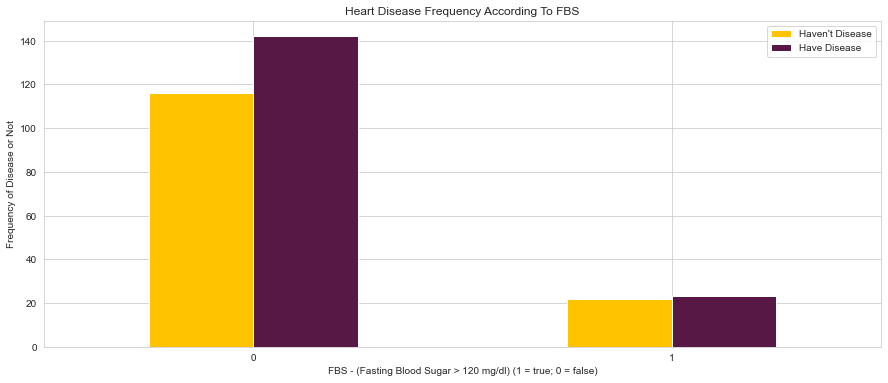

In [111]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

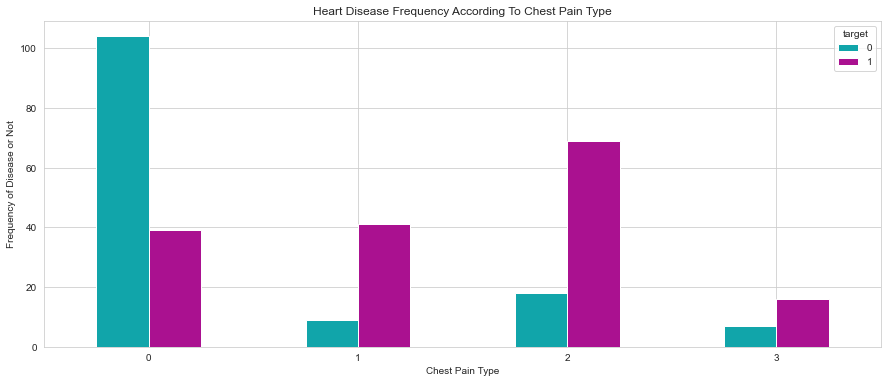

In [112]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Creating Dummy Variables
Puisque 'cp', 'thal' et 'slope' sont des variables catégoriques, nous les transformerons en variables dummy.

In [113]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [114]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [115]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Sélection des variables
## RFECV
L’élimination des caractéristiques récursives avec validation croisée (RFECV) est une méthode de sélection des caractéristiques qui utilise une combinaison d’élimination des caractéristiques récursives et de validation croisée pour identifier les caractéristiques les plus importantes d’un ensemble de données. Cette méthode est souvent utilisée dans l’apprentissage automatique pour réduire la dimensionnalité de l’espace des fonctionnalités et améliorer la précision des modèles.

In [116]:
y=df['target']

In [117]:
# Storing explicative variables 
X=df.drop(labels = ["target"],axis = 1)

In [118]:
rfecv = RFECV(estimator=RandomForestClassifier(), cv=5,scoring='accuracy', step=1)
rfecv = rfecv.fit(X, y)

In [119]:
print('Optimal number of features :', rfecv.n_features_)
print('Using RFECV the Best features are :', X.columns[rfecv.support_])

Optimal number of features : 21
Using RFECV the Best features are : Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')


# Selectkbest
## SelectKBest 
sélectionne les principales caractéristiques k dans un ensemble de données basé sur des tests statistiques tels que le chi carré, ANOVA F-test, ou des informations mutuelles. Cette méthode est couramment utilisée dans l’apprentissage automatique pour améliorer la précision du modèle en réduisant la dimension de l’espace des fonctionnalités. La méthode classe les caractéristiques à l’aide de tests statistiques et sélectionne les caractéristiques k supérieures avec les scores les plus élevés.
Notre approche consistera à sélectionner la caractéristique catégorielle supérieure à l’aide du test chi2, puis à sélectionner les caractéristiques numériques à l’aide de f_regression.

In [120]:
# Storing numercial and categorical features:
num_features=['age','trestbps', 'chol', 'thalach','oldpeak', 'ca']
cat_features=['target', 'exang', 'fbs', 'sex','cp_0','cp_1','cp_2','cp_3', 'thal_0','thal_1', 'thal_2','thal_3', 'slope_0','slope_1','slope_2','restecg']

In [121]:
cat= X.drop(columns=num_features)

In [122]:
significant_vars = []

for col in cat_features:
    cont_table = pd.crosstab(df[col], df['target'])
    chi2, p, dof, expected = chi2_contingency(cont_table)
    
    if p < 0.05:
        significant_vars.append(col)

print("Significant variables:", significant_vars)

Significant variables: ['target', 'exang', 'sex', 'cp_0', 'cp_1', 'cp_2', 'thal_2', 'thal_3', 'slope_1', 'slope_2', 'restecg']


Index(['exang', 'cp_0', 'cp_2', 'thal_2', 'thal_3', 'slope_2'], dtype='object')


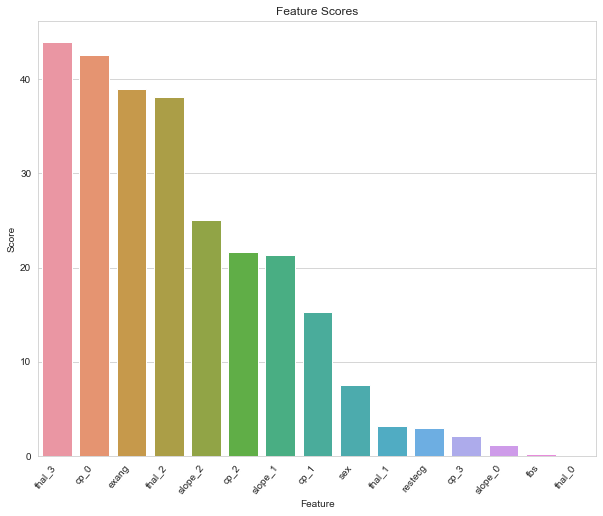

In [123]:
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=6)
X_new = selector.fit_transform(cat, y)

selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = cat.columns[selected_features_indices]

# print the selected feature names
print(selected_features_names)

# get the scores of all features
feature_scores = selector.scores_

# get the indices of the features sorted by their scores
sorted_feature_indices = feature_scores.argsort()[::-1]

# get the names of the sorted features
sorted_feature_names = cat.columns[sorted_feature_indices]
feature_scores_df = pd.DataFrame({'Feature': sorted_feature_names, 'Score': feature_scores[sorted_feature_indices]})

# plot the feature scores
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='Feature', y='Score', data=feature_scores_df, order=sorted_feature_names, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Feature Scores')

plt.show()

Toutes les variables categoriques ont des scores importantes qui peuvent aider dans la prediction de modele sauf la varibale "thal_0" et "fbs"

In [124]:
num=X[num_features]

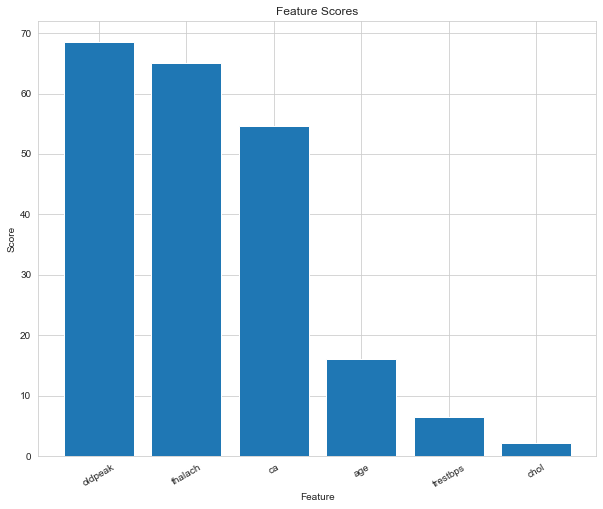

In [125]:
selector = SelectKBest(f_regression, k=2)
X_new = selector.fit_transform(num, y)

selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = num.columns[selected_features_indices]

# print the selected feature names
# get the scores of all features
feature_scores = selector.scores_

# get the indices of the features sorted by their scores
sorted_feature_indices = feature_scores.argsort()[::-1]

# get the names of the sorted features
sorted_feature_names = num.columns[sorted_feature_indices]
feature_scores_df = pd.DataFrame({'Feature': sorted_feature_names, 'Score': feature_scores[sorted_feature_indices]})


fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(range(len(feature_scores)), feature_scores[sorted_feature_indices])
ax.set_xticks(range(len(feature_scores)))
ax.set_xticklabels(sorted_feature_names, rotation=30)
ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Feature Scores')

plt.show()

Toutes les variables numériques, à l’exception de 'chol', contiennent des informations importantes.

Nous allons diviser nos données. 80% de nos données seront des données de train et 20% seront des données de test.

In [126]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression logistique



In [127]:
X = df.drop('target', axis=1)
y = df['target']

# Add a constant column to X for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Get the AIC and BIC values
aic = result.aic
bic = result.bic

# Print the summary table
print(result.summary())
print("AIC:", aic)
print("BIC:", bic)
# Predict the target variable for the test set
y_pred = result.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Compute and print the accuracy of the model using the test data
acc = sum(y_pred == y_test) / len(y_test) * 100
print("Test Accuracy {:.2f}%".format(acc))

         Current function value: 0.341169
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                           18
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.5043
Time:                        20:16:04   Log-Likelihood:                -82.563
converged:                      False   LL-Null:                       -166.55
Covariance Type:            nonrobust   LLR p-value:                 2.271e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5469        nan        nan        nan         nan         nan
age           -0.0020      0.026     -0.077      0.938      -0.05

C:\Users\HP\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\HP\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Les variables "age" "exand" "oldpeak" "ca" ont des coefficients significatifs car leurs p_value < 0.05
 Les résultats montrent également que le modèle est statistiquement significatif parce que la valeur p du LLR est inférieure à 0,05. Cela signifie que le modèle de régression logistique peut prédire si une personne sera malade ou non, mieux que le modèle nul.

Confusion Matrix:
 [[26  3]
 [ 4 28]]


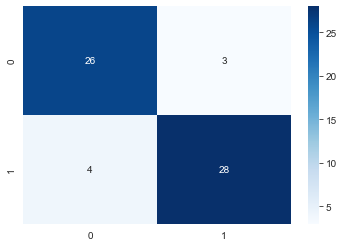

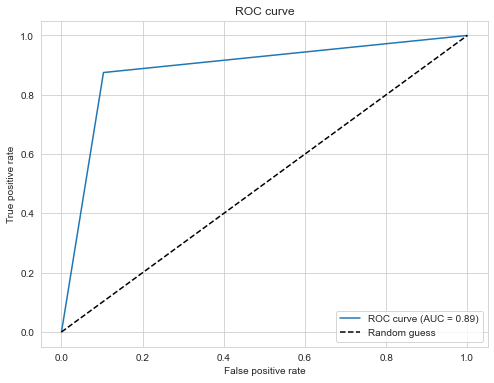

TypeError: 'NoneType' object is not callable

In [128]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
# Plot the ROC curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred)
auc_lr = roc_auc_score(y_test, y_pred)

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='ROC curve (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()(loc="lower right")
plt.show()

En conclusion, le modèle de régression logistique a montré un bon rendement global pour la classification binaire, avec une précision de 88.52%, un recall de 0,89.

# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc=dtc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred1 = dtc.predict(x_test)


Accuracy: 0.819672131147541
Precision: 0.8620689655172413
Recall: 0.78125


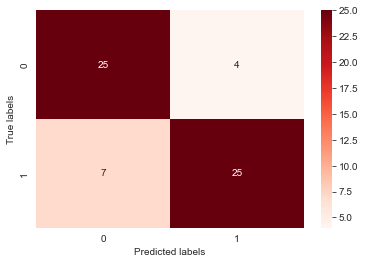

AUC: 0.8216594827586207


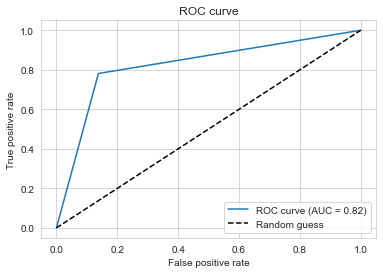

In [130]:
# Compute accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
auc = roc_auc_score(y_test, y_pred1)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classification


In [138]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rfc=rf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred2 = rfc.predict(x_test)

Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625


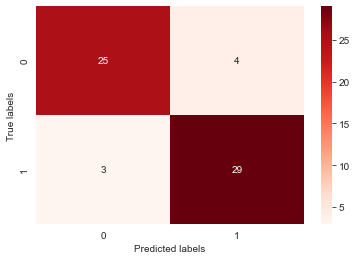

AUC: 0.8841594827586207


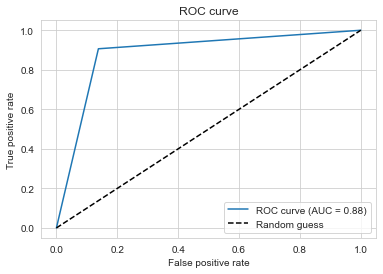

In [140]:
# Compute accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix as a heatmap

sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
# Compute ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred2)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Comparing Models


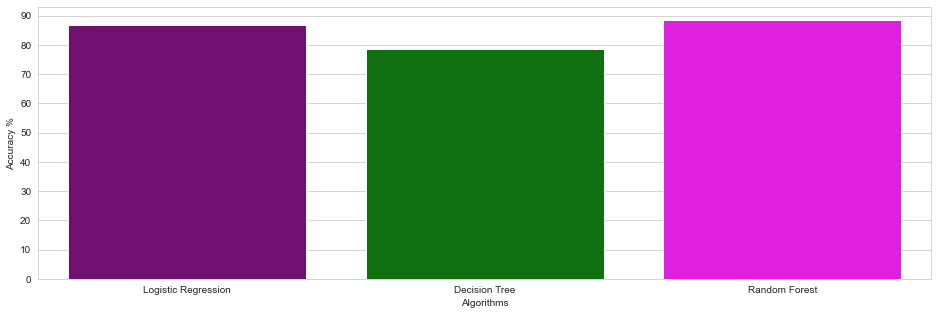

In [66]:
colors = ["purple", "green", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Nos modèles fonctionnent bien, mais le meilleur d’entre eux est Random Forest avec 88,52% de précision. Regardons leurs matrices de confusion.


#  Matrice de Confusion


In [67]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [68]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

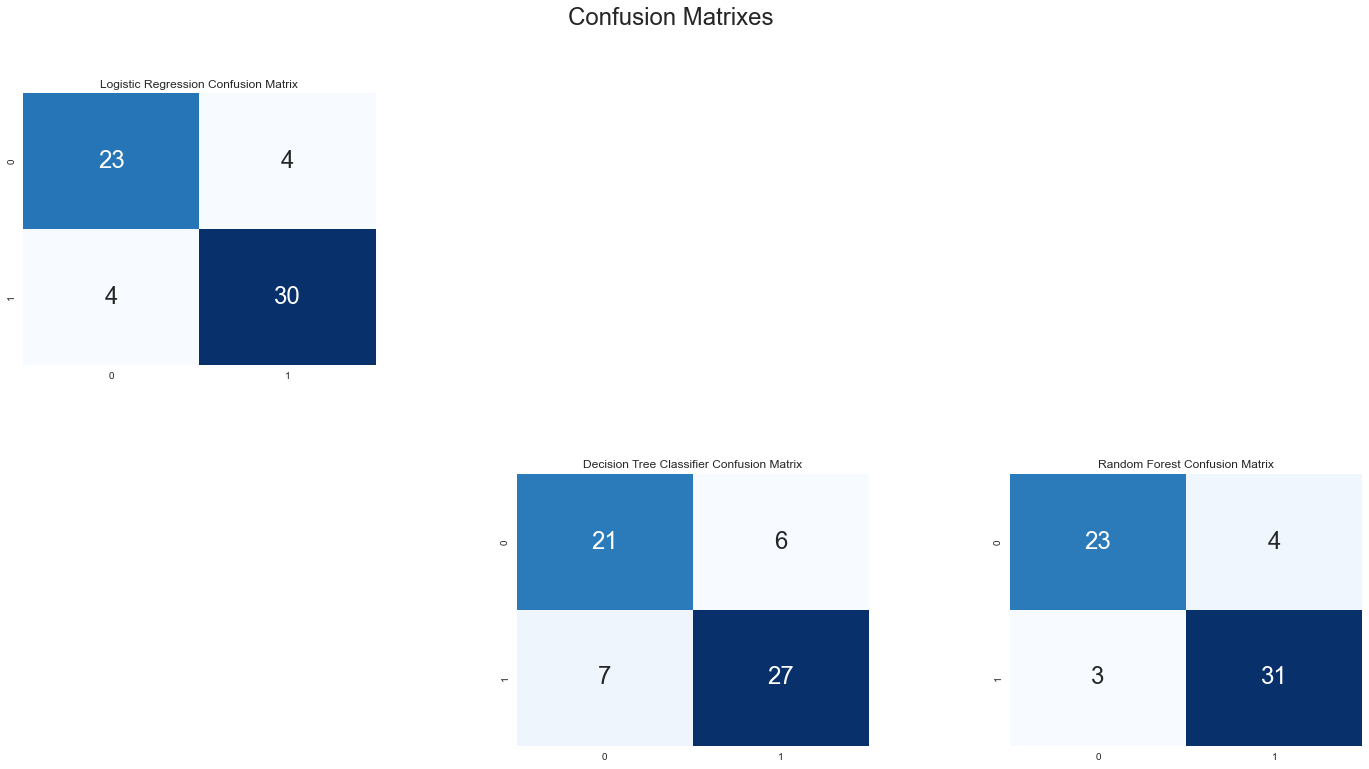

In [69]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()